In [ ]:
from skyfield.api import load

# Create a timescale and ask the current time.
ts = load.timescale()
t = ts.now()

# Load the JPL ephemeris DE421 (covers 1900-2050).
planets = load('de421.bsp')
earth, mars = planets['earth'], planets['mars']

# What's the position of Mars, viewed from Earth?
astrometric = earth.at(t).observe(mars)
ra, dec, distance = astrometric.radec()

print(ra)
print(dec)
print(distance)

In [ ]:
sun = planets['sun']

In [ ]:
astromet = sun.at(t).observe(earth)
ra, dec, distance = astromet.radec()
print(ra)
print(dec)
print(distance)

In [ ]:
distance.au

In [ ]:
import matplotlib.pyplot as plt

In [1]:
## ok together now
# Load the JPL ephemeris DE421 (covers 1900-2050).
from skyfield.api import load
planets = load('de421.bsp')

1994-07-13 06:23:00 TT


1962-10-20 06:23:00 TT


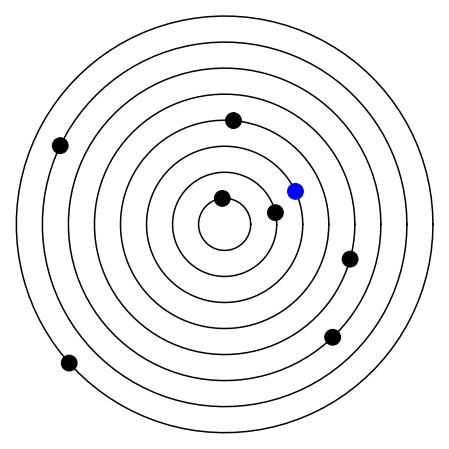

In [19]:
#plt.axes(projection = 'polar') 
import numpy as np
import matplotlib.pyplot as plt

ts = load.timescale()
t = ts.tt(1962, 10, 20, 6, 23, 0)
print(t.tt_strftime())

p = ["MERCURY BARYCENTER", "VENUS BARYCENTER", "EARTH BARYCENTER", "MARS BARYCENTER", 
     "JUPITER BARYCENTER", "SATURN BARYCENTER", "URANUS BARYCENTER", "NEPTUNE BARYCENTER"]
ra, dec, distance, scaled_dist, plot_ring = [], [], [], [], []
sun = planets['sun']
r = 1
for planet in p:
    planet = planets[planet]
    astrometric = sun.at(t).observe(planet)
    rasc, d, dis = astrometric.radec()
    ra.append(rasc.radians)
    dec.append(d)
    distance.append(dis)
    scaled_dist.append(r)
    plot_ring.append([r]*100)
    r+=1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.spines['polar'].set_visible(False)
ax.grid(False)
for ring in plot_ring:
    ax.plot(np.linspace(0, 2*np.pi, 100), ring, color='k', linestyle='-')
    
c = ax.scatter(ra, scaled_dist, c=['k', 'k', 'b', 'k', 'k', 'k', 'k', 'k'], s=250, zorder=200)


#plt.polar(ra, scaled_dist, 'k.', s=5)
#plt.show()